<img src="../fasp/runner/credits/images/Horizontal2.png" style="float: right;">


### Run compute on 4 WES servers - where the Horizontal demo goes next
Runs  compute on four different platforms. Three are WES servers and one is Google Cloud.

The compute is only MD5 but this example shows the capability to orchestrate a set of servers which show diversity geographically, organizationally and on different technical platforms. 



In [20]:
from fasp.runner import FASPRunner

# The implementations we're using
from fasp.loc import crdcDRSClient
from fasp.workflow import sbcgcWESClient, GCPLSsamtools, ElixirWESClient, DNAStackWESClient
from fasp.search import DataConnectClient

faspRunner = FASPRunner(program='Four WES servers')
settings = faspRunner.settings

sbProject = settings['SevenBridgesProject']

# Step 1 - Discovery
# query for relevant DRS objects
searchClient = DataConnectClient('https://data.publisher.dnastack.com/data-connect/')

# Step 3 - set up the WES clients
location = 'projects/{}/locations/{}'.format(settings['GCPProject'], settings['GCPPipelineRegion'])
sam2 = GCPLSsamtools(location, settings['GCPOutputBucket'])
mysams = {'s3':{'wes':sbcgcWESClient(settings['SevenBridgesProject']), 'access_id' : 's3'},
          'gs': {'wes':sam2, 'access_id': 'gs'},
          'el': {'wes':ElixirWESClient('https://wes.rahtiapp.fi/ga4gh/wes/v1'), 'access_id' : 's3'},
          'dn': {'wes':DNAStackWESClient('~/.keys/dnastack_wes_credentials.json'), 'access_id' : 'gs'}
         }

In [21]:
query = '''
    SELECT 'case_'||associated_entities__case_gdc_id, file_id
    FROM collections.public_datasets.cshcodeathon_gdc_rel24_filedata_active 
    WHERE data_format = 'BAM' 
        AND project_disease_type = 'Breast Invasive Carcinoma'
    LIMIT 1
'''


for sam, samClient in mysams.items():
    drsClient = crdcDRSClient('~/.keys/crdc_credentials.json', samClient['access_id'])
    faspRunner.configure(searchClient, drsClient, samClient['wes'])
    faspRunner.runQuery(query, 'Four WES ' + sam)

Running query

    SELECT 'case_'||associated_entities__case_gdc_id , file_id
    FROM collections.public_datasets.cshcodeathon_gdc_rel24_filedata_active 
    where data_format = 'BAM' 
    and project_disease_type = 'Breast Invasive Carcinoma'
    limit 1
_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
subject=case_1b703058-e596-45bc-80fe-8b98d545c2e2, drsID=030e5e74-6461-4f05-a399-de8e470bc056
https://cgc-ga4gh-api.sbgenomics.com/ga4gh/wes/v1
workflow submitted, run:f936fd5d-0c76-4b68-b538-70d2f1553c76
____________________________________________________________
Running query

    SELECT 'case_'||associated_entities__case_gdc_id , file_id
    FROM collections.public_datasets.cshcodeathon_gdc_rel24_filedata_active 
    where data_format = 'BAM' 
    and project_disease_type = 'Breast Invasive Carcinoma'
    limit 1
_Retrieving the query_
____Page1_______________
____Page2_______________

DataConnectClient
crdcDRSClient
sbcgcWESClient
DataConnectClient
crdcDRSClient
GCPLSsamtools
DataConnectClient
crdcDRSClient
ElixirWESClient
DataConnectClient
crdcDRSClient
DNAStackWESClient


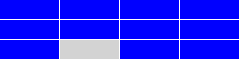

In [22]:
faspRunner.getFASPicon()